<a href="https://colab.research.google.com/github/TarekHasan011/Simulation-and-Modeling-Laboratory/blob/main/CSI_424(A)_Simulation_%26_Modeling_Laboratory_Assignment_6_011_181_076_Md_Tarek_Hasan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Single Server Queue

In [ ]:
import numpy as np
np.random.seed(0)

In [ ]:
test_iit = [0.8,1.7,0.3,1.9,0.5,0.3,2.1]
test_service_time = [2.2,0.5,0.4,2.8,0.2,0.6,0.9]

In [ ]:
def get_iit():
    return test_iit.pop(0)
def get_service_time():
    return test_service_time.pop(0)

In [ ]:
def extract_next(Queue,mechanism):
    if mechanism == "FIFO":
        return Queue.pop(0)
    elif mechanism == "LIFO":
        return Queue.pop(len(Queue)-1)
    else:
        min_service_time = np.inf
        index = 0
        for i in range(len(Queue)):
            if Queue[i][1]<min_service_time:
                min_service_time = Queue[i][1]
                index = i
        return Queue.pop(index)

def SSQ(n,pa,ps,mechanism="FIFO"):
    clock = 0
    next_arrival = clock + np.random.exponential(pa)

    # # Test
    # next_arrival = clock + get_iit()
    # # Test

    next_departure = np.inf
    server_status = 0
    Queue = []
    number_of_customer_served = 0
    total_delay = 0
    area_under_Qt = 0
    area_under_Bt = 0

    while number_of_customer_served < n:
        if next_arrival < next_departure:
            area_under_Qt += ((next_arrival-clock) * len(Queue))
            area_under_Bt += ((next_arrival-clock) * server_status)
            clock = next_arrival
            service_time = np.random.exponential(ps)
            next_arrival = clock + np.random.exponential(pa)

            # # Test 
            # service_time = get_service_time()
            # next_arrival = clock + get_iit()
            # # Test


            if server_status == 1:
                Queue.append([clock,service_time])
            else:
                server_status = 1
                next_departure = clock + service_time
        else:
            area_under_Qt += ((next_departure-clock) * len(Queue))
            area_under_Bt += ((next_departure-clock) * server_status)

            clock = next_departure
            number_of_customer_served+=1

            if number_of_customer_served==n:
                continue
            
            if len(Queue) == 0:
                server_status = 0
                next_departure = np.inf
            else:
                temp = extract_next(Queue,mechanism)
                total_delay += (clock - temp[0])
                next_departure = (clock + temp[1])
            # Average delay,        Expected Number of Customer in Queue, Expected utilization
    return [round(total_delay/n,3), round(area_under_Qt/clock,3), round(area_under_Bt/clock,3)]


In [ ]:
mechanism = ["FIFO", "LIFO", "SJF"]
for x in mechanism:
    Average_Delay, Expected_Number_of_customer_in_Queue, Server_Utilization = SSQ(n=6,pa=0.2,ps=0.3,mechanism=x)
    print(f"Queue characteristic: {x}")
    print(f'Average Delay : {Average_Delay}')
    print(f'Expected Number of Customer in Queue: {Expected_Number_of_customer_in_Queue}')
    print(f'Server Utilization: {Server_Utilization}')
    print()    

Queue characteristic: FIFO
Average Delay : 0.315
Expected Number of Customer in Queue: 1.494
Server Utilization: 0.925

Queue characteristic: LIFO
Average Delay : 0.019
Expected Number of Customer in Queue: 0.065
Server Utilization: 0.384

Queue characteristic: SJF
Average Delay : 0.096
Expected Number of Customer in Queue: 0.538
Server Utilization: 0.709



In [ ]:
no_of_customer = [5,10,15,20,25,30,35,40]
FIFO_delay_y = []
LIFO_delay_y = []
SJF_delay_y = []
FIFO_expected_customer_in_queue_y = []
LIFO_expected_customer_in_queue_y = []
SJF_expected_customer_in_queue_y = []
FIFO_utilization_y = []
LIFO_utilization_y = []
SJF_utilization_y = []

for x in mechanism:
    for y in no_of_customer:
        Average_Delay, Expected_Number_of_customer_in_Queue, Server_Utilization = SSQ(n=y,pa=0.2,ps=0.3,mechanism=x)

        if x == "FIFO":
            FIFO_delay_y.append(Average_Delay)
            FIFO_expected_customer_in_queue_y.append(Expected_Number_of_customer_in_Queue)
            FIFO_utilization_y.append(Server_Utilization)
        elif x == "LIFO":
            LIFO_delay_y.append(Average_Delay)
            LIFO_expected_customer_in_queue_y.append(Expected_Number_of_customer_in_Queue)
            LIFO_utilization_y.append(Server_Utilization)
        else:
            SJF_delay_y.append(Average_Delay)
            SJF_expected_customer_in_queue_y.append(Expected_Number_of_customer_in_Queue)
            SJF_utilization_y.append(Server_Utilization)


In [ ]:
import matplotlib.pyplot as plt

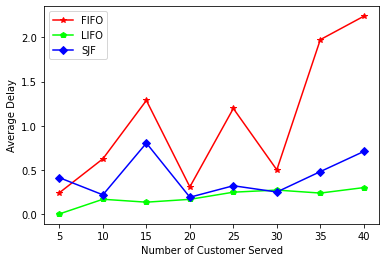

In [ ]:
# plt.figure(figsize=(10,10))
plt.plot(no_of_customer,FIFO_delay_y,label='FIFO',color="#ff0000",marker='*')
plt.plot(no_of_customer,LIFO_delay_y,label='LIFO',color="#00ff00",marker='p')
plt.plot(no_of_customer,SJF_delay_y,label='SJF',color="#0000ff",marker='D')
plt.legend()
plt.xlabel('Number of Customer Served')
plt.ylabel('Average Delay')
plt.show()

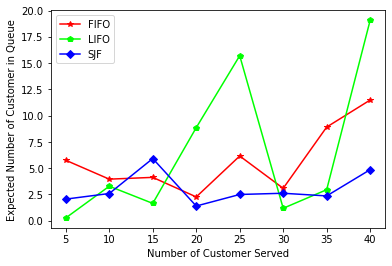

In [ ]:
# plt.figure(figsize=(10,10))
plt.plot(no_of_customer,FIFO_expected_customer_in_queue_y ,label='FIFO',color="#ff0000",marker='*')
plt.plot(no_of_customer,LIFO_expected_customer_in_queue_y,label='LIFO',color="#00ff00",marker='p')
plt.plot(no_of_customer,SJF_expected_customer_in_queue_y,label='SJF',color="#0000ff",marker='D')
plt.legend()
plt.xlabel('Number of Customer Served')
plt.ylabel('Expected Number of Customer in Queue')
plt.show()

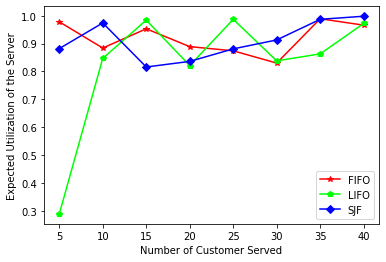

In [ ]:
# plt.figure(figsize=(10,10))
plt.plot(no_of_customer,FIFO_utilization_y,label='FIFO',color="#ff0000",marker='*')
plt.plot(no_of_customer,LIFO_utilization_y,label='LIFO',color="#00ff00",marker='p')
plt.plot(no_of_customer,SJF_utilization_y,label='SJF',color="#0000ff",marker='D')
plt.legend()
plt.xlabel('Number of Customer Served')
plt.ylabel('Expected Utilization of the Server')
plt.show()

For multiple runs, it is observed that Minimum average delay is found in LIFO (Last In First Out) Mechanism as it takes the last job first that's why it reduced the waiting time for that particular job and as we are taking random numbers from an exponential distribution, the service time is not much and that's why the jobs that come first don't need to wait that much time.

But it is found minimum expected number of customers in the queue and maximum utilization in SJF (Shortest Job First) Mechanism. As we are selecting the shortest job in the queue, that's it need not wait that long for one shortest job, it reduces the waiting time as well for shortest jobs.

As we are considering three matrices for comparison, we can conclude saying that Shortest Job First (SJF) is better than the other two mechanisms.